<a href="https://colab.research.google.com/github/hl105/deep-learning-practice/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multilayer Perceptrons
--
(= Deep feedforward networks = feedforward neural networks)
- Goal : approximate some function f*
 - map y = f(x;θ) and learn θ that result in the best function approximation
- feedforward: x -> computations to define f -> output y
 - no feedback connections (output being fed back to itself). When this happens, the neural network is extended to **recurrent neural networks** - used in NLP
- ex) convolutional network: used for object recognition from photos
- **Q:** What's the "networks" part?

  **A:** Many different functions are composed together - directed acyclic graph, like a chain structure.
  - f(x) =f3(f2(f1(x)))
  - **first layer:** f1
  - **second layer:** f2
  - **output layer:** f3
  - **depth:** the length of the chain - this is where the name "deep learning" comes from
- we drive f(x) to match f*(x)
  - each training data x has a label y
  - the trainig data specifies that the output layer must produce a value close to y at each point x
  - but the behaviors of other layers are not specified by the training data, thus the name **hidden layers.**
  - **Learning Algorithm** decides how to use the layers to produce desired output, not the trainig data
  - **activation functions** are used to compute hidden layer values
  - **back-propagation** is used to compute gradients of complicated functions - use chain rule
- **Universal Approximation Theorem:** A simple neural network can approximate a wide variety of interesting continuous functions

Learning XOR
---
- def: XOR function returns 1 when exactly one of two binary values is 1.
- a linear model cannot represent the XOR function
- let's try using a simple feedforward network with one hidden layer and two hidden units(h).
  - 1st layer: h = f1(x;W,c)
  - 2nd layer (output layer): y = f2(h;w,b) - use h as input
  - complete model: f(x;W,c,w,b) = f2(f1(x))

Linear Models vs Neural Networks
---
- the nonlineraity of a neural network causes loss functions to be nonconvex
- thus NN are trained by using gradient-based optimizers that drive the cost function to a very low value

Dataset -  Titanic: Machine Learning from Disaster
---

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [78]:
data = pd.read_csv('../content/drive/MyDrive/titanic/train.csv')

In [79]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
data['bSex'] = data['Sex'].map({'male': 0, 'female':1})
# extract only the parts that we need
features = data[['bSex','Pclass']].to_numpy()
labels = data['Survived'].to_numpy()


In [81]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3)
print(f"training size: {y_train.size}")
print(f"testing size:{y_test.size}")

training size: 623
testing size:268


In [82]:
# define model
model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [83]:
y_pred = model.predict(X_test)

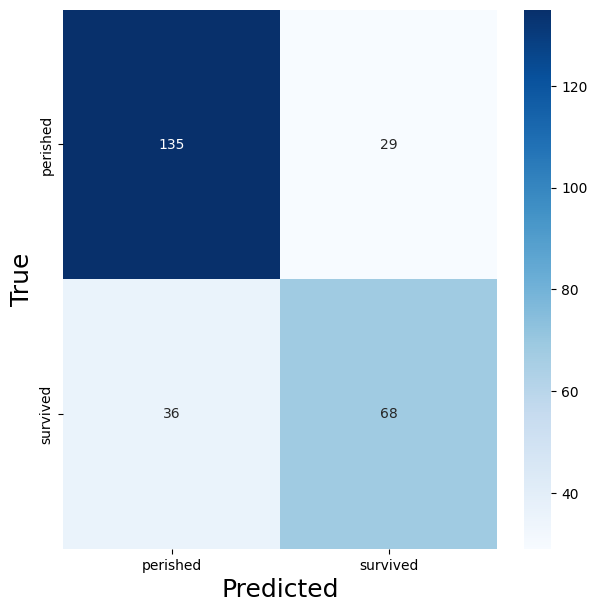

In [84]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index =['perished','survived'],columns =['perished','survived'])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("True", fontsize=18)
plt.show()